# Analytic integration of 4-nodes Finite Element



In [1]:
from __future__ import division
from sympy import *

In [2]:
init_session()

IPython console for SymPy 1.0 (Python 2.7.12-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [3]:
E, rho = symbols('E rho', positive=True)
nu, r, s = symbols('nu r s')

Constitutive equations in Voigt's notation

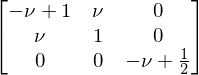

In [4]:
factor = E/((1+nu)*(1-2*nu))
factor = 1
C = factor*Matrix([
     [1 - nu,nu,0], 
     [nu,1,0], 
     [0,0,(1-2*nu)/2]])
display(C)

Interpolation functions

    2-----1
    |     |
    |     |
    3-----4

In [5]:
N = S(1)/4*Matrix([(1 + r) * (1 + s),
                  (1 - r) * (1 + s),
                  (1 - r) * (1 - s),
                  (1 + r) * (1 - s)])

Interpolation matrix

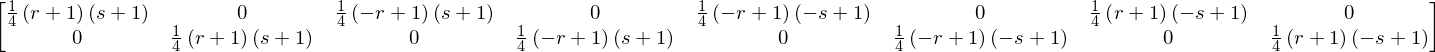

In [6]:
H = zeros(2, 8)
for i in range(4):
    H[0, 2*i] = N[i]
    H[1, 2*i + 1] = N[i]

display(H)

Mass matrix

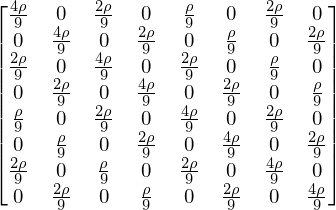

In [7]:
M_inte = H.T * H
M = integrate(integrate(rho*M_inte, [r, -1, 1]), [s, -1, 1])
display(M)

Derivatives interpolation matrix

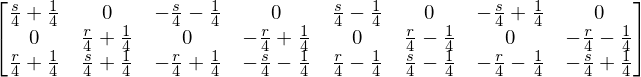

In [8]:
B = zeros(3, 8)
for i in range(4):
    B[0, 2*i] = diff(N[i], r)
    B[1, 2*i + 1] = diff(N[i], s)
    B[2, 2*i] = diff(N[i], s)
    B[2, 2*i + 1] = diff(N[i], r)

display(B)

Stiffness matrix

In [9]:
K_inte = B.T * C * B
K = simplify(integrate(integrate(K_inte, [r, -1, 1]), [s, -1, 1]))

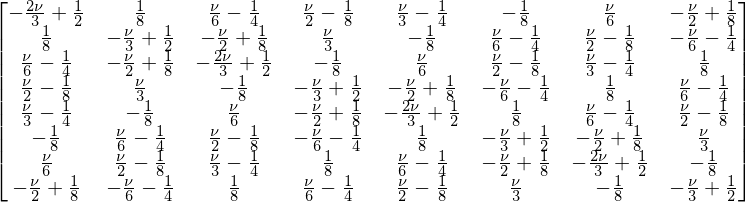

In [10]:
display(K)

## Gauss integration

In [11]:
wts = [2, [1,1], [S(5)/9, S(8)/9, S(5)/9], 
        [(18+sqrt(30))/36,(18+sqrt(30))/36, (18-sqrt(30))/36, (18-sqrt(30))/36]];
pts = [0, [-sqrt(S(1)/3), sqrt(S(1)/3)], [-sqrt(S(3)/5), 0, sqrt(S(3)/5)],
[-sqrt(S(3)/7 - S(2)/7*sqrt((6)/5)), sqrt(S(3)/7 - S(2)/7*sqrt(S(6)/5)),
-sqrt(S(3)/7 + S(2)/7*sqrt(S(6)/5)), sqrt(S(3)/7 + S(2)/7*sqrt(S(6)/5))]]

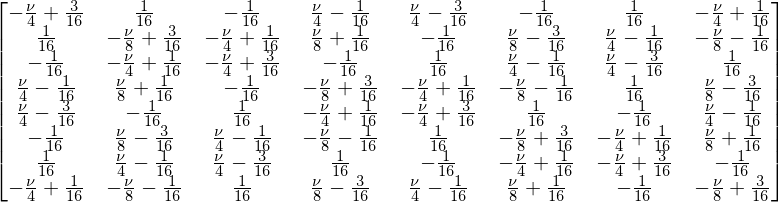

In [12]:
K_1pts = simplify(K_inte.subs({r:0, s:0})*wts[0])
display(K_1pts)

In [13]:
K_2pts = zeros(8, 8)
for row in range(8):
    for col in range(8):
        K_2pts[row, col] = sum(wts[1][kx]*wts[1][ky]*
                               K_inte[row, col].subs({r: pts[1][kx], s:pts[1][ky]})
                               for kx in range(2) for ky in range(2))



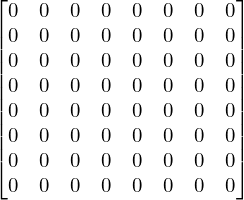

In [14]:
simplify(K_2pts - K)

In [15]:
K_3pts = zeros(8, 8)
for row in range(8):
    for col in range(8):
        K_3pts[row, col] = sum(wts[2][kx]*wts[2][ky]*
                               K_inte[row, col].subs({r: pts[2][kx], s:pts[2][ky]})
                               for kx in range(3) for ky in range(3))



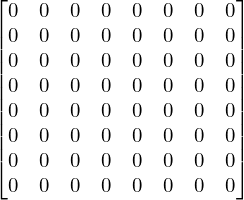

In [16]:
simplify(K_3pts - K)

# References

1. Bathe, Klaus-Jürgen. Finite element procedures. Klaus-Jurgen Bathe, 2006.

In [17]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()